<a href="https://colab.research.google.com/github/ChowtooriKedari/BDA-Project/blob/main/Final_BDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import all required Hash Functions**

In [ ]:
!pip install siphash-cffi      
!pip install spookyhash        # Offers 32- 64- and 128-bit oneshot and incremental hashes
!pip install pyfarmhash        # Provides both 32 and 64 bit Hash Operations
!pip install filesplit         # Module that helps in splitting files with equal size
!pip install jhashcode         # HashCode allows you to generate the hashes with the chosen algorithm (MD2, MD5and SHA-512)
!pip install bitarray          # This module provides an object type which efficiently represents an array of booleans
!pip install cityhash          # The package contains 32-,64- and 128-bit implementations of the CityHash algorithm
!pip install fnvhash           # Provides both 32 and 63 bit Hash Operations
!pip install pyhash            # pyhash is a python non-cryptographic hash library
!pip install xxhash            # xxhash is a Python binding for the xxHash library
!pip install spooky            # Offers 32- 64- and 128-bit oneshot and incremental hashes
!pip install mmh3              # Python wrapper for MurmurHash (MurmurHash3), a set of fast and robust hash functions

**Import all required header files**

In [ ]:
from cityhash import CityHash32, CityHash64
from fsplit.filesplit import Filesplit
from bitarray import bitarray
from fnvhash  import fnv1a_32
from fnvhash  import fnv1a_64
from spooky   import hash32 
from siphash  import *
import spookyhash
import statistics
import jhashcode 
import farmhash
import requests 
import pyhash
import xxhash
import mmh3
import math
import gzip                                                 # For unzipping .gz extension Files
fs = Filesplit()                                            # For Splitting Up Files

**Create Directories to store Hash Function Files and Intermediate Files**

In [ ]:
!mkdir 32_bit_hash_functions                      # Create a directory for Storing 32_bit_hash_functions
!mkdir hash_32_intermediates                      # Create a directory for Storing 32_bit_hash_function Intermediates 
!mkdir 64_bit_hash_functions                      # Create a directory for Storing 64_bit_hash_functions
!mkdir hash_64_intermediates                      # Create a directory for Storing 64_bit_hash_function Intermediates
!mkdir split_up_dataset                           # Create a directory for Storing Split Dataset

**Download and Unzip the Downloaded Dataset**

`***Split the dataset into equal Partitions inorder to make the processing Easy***`



In [ ]:
!wget https://snap.stanford.edu/data/bigdata/memetracker9/quotes_2008-08.txt.gz

--2020-12-19 09:46:35--  https://snap.stanford.edu/data/bigdata/memetracker9/quotes_2008-08.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127610642 (1.0G) [application/x-gzip]
Saving to: ‘quotes_2008-08.txt.gz’

quotes_2008-08.txt. 100%[===================>]   1.05G  12.4MB/s    in 1m 53s  

2020-12-19 09:48:29 (9.50 MB/s) - ‘quotes_2008-08.txt.gz’ saved [1127610642/1127610642]



In [ ]:
!gunzip /content/quotes_2008-08.txt.gz

In [ ]:
fs.split(file="/content/quotes_2008-08.txt",split_size=600000000,output_dir="/content/split_up_dataset")

**Function to compute the Number of Trailing Zeroes**



In [ ]:
def return_tail_length(binary_value):
	binary_value = str(binary_value)	          #  binary representation of string
	reverse_binary_value = binary_value[::-1]	  #  reversing the binary representation to count 0's
	count = 0
	for i in reverse_binary_value:
		if i is '0':
			count = count + 1												# Increment count by one for every zero bit
		else:
			break		
	return count

In [ ]:
with open("/content/32_bit_hash_functions/hash_function1.txt", 'w') as h1_file, open("/content/32_bit_hash_functions/hash_function2.txt", 'w') as h2_file, open("/content/32_bit_hash_functions/hash_function3.txt", 'w') as h3_file, open("/content/32_bit_hash_functions/hash_function4.txt", 'w') as h4_file,open("/content/32_bit_hash_functions/hash_function5.txt", 'w') as h5_file,open("/content/32_bit_hash_functions/hash_function6.txt", 'w') as h6_file,open("/content/32_bit_hash_functions/hash_function7.txt", 'w') as h7_file,open("/content/32_bit_hash_functions/hash_function8.txt", 'w') as h8_file:    
        x=[]
        j=0
        file_read = open("/content/split_up_dataset/quotes_2008-08_1.txt","r")  # Open the file in read mode
        for line in file_read:
            data = line.split("\t")
            if data[0] is 'Q':
                # Perform Hashing with the functions provided

                res = bytes(data[1], 'utf-8')                             # Represent data in the form of bytes
                hash_value_1 = abs(xxhash.xxh32(data[1]).intdigest())     # Generates 32 bit hash Value
                hash_value_2 = abs(hash32(data[1]))                       # Generates 32 bit hash Value
                hash_value_3 = abs(jhashcode.hashcode(data[1]))           # Generates 32 bit hash Value
                hash_value_4 = abs(mmh3.hash(data[1]))                    # Generates 32 bit hash Value
                hash_value_5= abs(farmhash.hash32(data[1]))               # Generates 32 bit hash Value
                hash_value_6 = abs(spookyhash.hash32(res))                # Generates 32 bit hash Value
                hash_value_7=abs(fnv1a_32(res))                           # Generates 32 bit hash Value
                hash_value_8=abs(CityHash32(data[1]))                     # Generates 32 bit hash Value
                
                # binary representation
                
                binary_1 = format(hash_value_1, '032b')            # Calculating the 32-bit binary value for hash_value_1 
                binary_2 = format(hash_value_2, '032b')            # Calculating the 32-bit binary value for hash_value_2
                binary_3 = format(hash_value_3, '032b')            # Calculating the 32-bit binary value for hash_value_3
                binary_4 = format(hash_value_4, '032b')            # Calculating the 32-bit binary value for hash_value_4
                binary_5 = format(hash_value_5, '032b')            # Calculating the 32-bit binary value for hash_value_5
                binary_6 = format(hash_value_6, '032b')            # Calculating the 32-bit binary value for hash_value_6
                binary_7 = format(hash_value_7, '032b')            # Calculating the 32-bit binary value for hash_value_7
                binary_8 = format(hash_value_8, '032b')            # Calculating the 32-bit binary value for hash_value_8
  
                # trailing zeros
  
                x.insert(j, return_tail_length(binary_1))
                h1_file.write("%s\n" % str(return_tail_length(binary_1)))   # Writing binary_1 trailing count value to file_1 
                h2_file.write("%s\n" % str(return_tail_length(binary_2)))   # Writing binary_2 trailing count value to file_2
                h3_file.write("%s\n" % str(return_tail_length(binary_3)))   # Writing binary_3 trailing count value to file_3
                h4_file.write("%s\n" % str(return_tail_length(binary_4)))   # Writing binary_4 trailing count value to file_4
                h5_file.write("%s\n" % str(return_tail_length(binary_5)))   # Writing binary_5 trailing count value to file_5
                h6_file.write("%s\n" % str(return_tail_length(binary_6)))   # Writing binary_6 trailing count value to file_6
                h7_file.write("%s\n" % str(return_tail_length(binary_7)))   # Writing binary_7 trailing count value to file_7           
                h8_file.write("%s\n" % str(return_tail_length(binary_8)))   # Writing binary_8 trailing count value to file_8
             
                j=j+1 
        file_read.close()
h1_file.close()                           # Close file-1
h2_file.close()                           # Close file-2
h3_file.close()                           # Close file-3
h4_file.close()                           # Close file-4
h5_file.close()                           # Close file-5
h6_file.close()                           # Close file-6
h7_file.close()                           # Close file-7
h8_file.close()                           # Close file-8

**File SplitUp into equal parts**



In [ ]:
files=["1","2","3","4","5","6","7","8"]                                        
for file in files:                                 # Representing the 8 Hash Functions by Partitioning them equally
  fs.split(file="/content/32_bit_hash_functions/hash_function"+file+".txt",split_size=2500000,output_dir="/content/hash_32_intermediates")

**Processing all the Hash Files generated from the previous cell**

In [ ]:
p=[]                                      
files=["1","2","3" ]
filer=["1_","2_","3_","4_","5_","6_","7_","8_"]
for t in filer:
  h1_max=0
  for file in files:
    with open("/content/hash_32_intermediates/hash_function"+t+file+".txt") as myfile:  # Process all intermediate files
      for f in myfile:
             if(f.rstrip('\n')!=''):
               if(int(f.rstrip('\n'))>h1_max):      # Check if the calculated value in the file is greater than the temp                            
                h1_max=int(float(f.rstrip('\n')))   # If the calculated value is higher,assign it to the temp
      myfile.close()
  p.append(h1_max)

In [ ]:
avg_hash1 = (2**(p[0]) + 2**(p[1]))/ float(2)# Compute avg_hash1 as 2^(max_trailing_zeroes of HF-1)+2^(max_trailing_zeroes of HF-2)/2 
avg_hash2 = (2**(p[2]) + 2**(p[3]))/ float(2)# Compute avg_hash2 as 2^(max_trailing_zeroes of HF-3)+2^(max_trailing_zeroes of HF-4)/2
avg_hash3 = (2**(p[4]) + 2**(p[5]))/ float(2)# Compute avg_hash3 as 2^(max_trailing_zeroes of HF-5)+2^(max_trailing_zeroes of HF-6)/2
avg_hash4 = (2**(p[6]) + 2**(p[7]))/ float(2)# Compute avg_hash4 as 2^(max_trailing_zeroes of HF-7)+2^(max_trailing_zeroes of HF-8)/2
distinct_quotes= math.ceil(statistics.median([avg_hash1, avg_hash2 ,avg_hash3,avg_hash4]))
print ("Estimated number of distinct quotes:",distinct_quotes) 

Estimated number of distinct quotes: 983040


**64-BIT FUNCTIONS**

In [ ]:
x1=[]                                                            # Create an Empty List to store Hash_Values
j=0
with open("/content/64_bit_hash_functions/hash_function1.txt", 'w') as h1_file:    # Create a file to store the obtained hash_values
        file_read = open("/content/split_up_dataset/quotes_2008-08_1.txt","r")     # Open the dataset file in read mode
        for line in file_read:                           
            data = line.split("\t")
            if data[0] is 'Q':
                hash_value_1 = abs(xxhash.xxh64(data[1]).intdigest())
              
                # binary representation
                binary_1 = format(hash_value_1, '064b')

                k=return_tail_length(binary_1)
                
                # Write the tailing_zeroes_count to a new file
                
                h1_file.write("%s\n" % str(k))
                x1.insert(j, return_tail_length(binary_1))
                j=j+1 
        file_read.close()
h1_file.close()

In [ ]:
fs.split(file="/content/64_bit_hash_functions/hash_function1.txt",split_size=2500000,output_dir="/content/hash_64_intermediates")
#File split up

In [ ]:
h1_max1=0
files=["1","2","3" ]
for file in files:
    with open("/content/hash_64_intermediates/hash_function1_"+file+".txt") as myfile:
        for f in myfile:
             if(f.rstrip('\n')!=''):
               if(int(f.rstrip('\n'))>h1_max1):     # Check if the calculated value in the file is greater than the temp                            
                h1_max1=int(float(f.rstrip('\n')))   # If the calculated value is higher,assign it to the temp
        myfile.close()

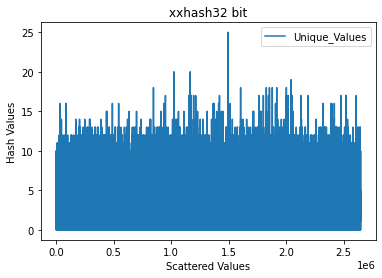

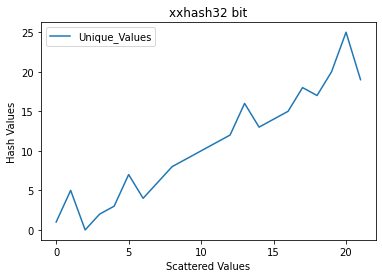

--------------------------------------------------------------


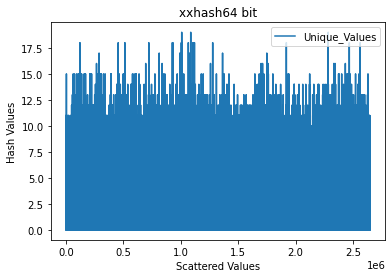

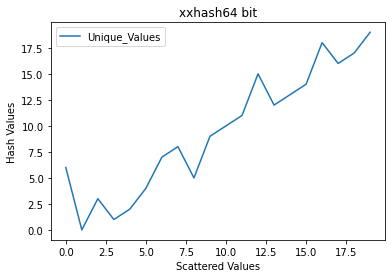

In [ ]:
import matplotlib.pyplot as plt
y1 = []
for i in range(2648156):
w  y1.insert(i,i);
plt.plot(y1, x, label="Unique_Values")
plt.plot()
plt.ylabel("Hash Values")
plt.xlabel("Scattered Values")
plt.title("xxhash32 bit")
plt.legend()
plt.show() 

y=[]
unique_list = [] 
      
    # traverse for all elements 
for i in x: 
        # check if exists in unique_list or not 
        if i not in unique_list: 
            unique_list.append(i) 
    # print list 

l=max(unique_list)
for i in range(len(unique_list)):
  y.insert(i,i)
plt.plot(y, unique_list,label="Unique_Values")
plt.plot()
plt.ylabel("Hash Values")
plt.xlabel("Scattered Values")
plt.title("xxhash32 bit")
plt.legend()
plt.show()

print("-----------------------------------------------------------------------------------------------------")

unique_list1 = [] 
      
    # traverse for all elements 
for i in x1: 
        # check if exists in unique_list or not 
        if i not in unique_list1: 
            unique_list1.append(i) 
    # print list
plt.plot(y1, x1, label="Unique_Values")
plt.plot()
plt.ylabel("Hash Values")
plt.xlabel("Scattered Values")
plt.title("xxhash64 bit")
plt.legend()
plt.show()

y2=[]
l1=max(unique_list1)
for i in range(len(unique_list1)):  #l1+1):
  y2.insert(i,i)
plt.plot(y2, unique_list1,label="Unique_Values")
plt.plot()
plt.ylabel("Hash Values")
plt.xlabel("Scattered Values")
plt.title("xxhash64 bit")
plt.legend()
plt.show()